In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import pickle
from skimage import measure
import matplotlib.patches as mpatches

In [2]:
with open("asgrown.txt", "rb") as fp:   # Unpickling
    asgrown= pickle.load(fp)

len(asgrown)

22

In [3]:
with open("doped.txt", "rb") as fp:   # Unpickling
    doped= pickle.load(fp)

len(doped)

22

In [4]:
dist_ag = np.load('C:/Users/Josh_/distance_ag.npy')

In [5]:
dist_doped = np.load("C:/Users/Josh_/dist_arr_doped.npy")

In [7]:
np.amax(dist_doped)

39.05124837953327

In [8]:
large_switch = []
large_switch.append(doped[0][0])
large_switch.append(doped[1][0])
large_switch.append(doped[2][1])
large_switch.append(doped[3][0])
large_switch.append(doped[4][0])
large_switch.append(doped[5][0])
large_switch.append(doped[6][0])
large_switch.append(doped[7][0])
large_switch.append(doped[8][0])
large_switch.append(doped[9][1])
large_switch.append(doped[10][0])
large_switch.append(doped[11][1])
large_switch.append(doped[12][1])
large_switch.append(doped[13][0])
large_switch.append(doped[14][0])
large_switch.append(doped[15][0])
large_switch.append(doped[16][0])



In [9]:
ag_switch =[]
ag_switch.append(asgrown[0][1])
ag_switch.append(asgrown[1][0])
ag_switch.append(asgrown[2][0])
ag_switch.append(asgrown[3][2])
ag_switch.append(asgrown[4][2])
ag_switch.append(asgrown[5][5])
ag_switch.append(asgrown[6][7])
ag_switch.append(asgrown[7][6])
ag_switch.append(asgrown[8][9])
ag_switch.append(asgrown[9][8])
ag_switch.append(asgrown[10][5])
ag_switch.append(asgrown[11][2])
ag_switch.append(asgrown[12][2])


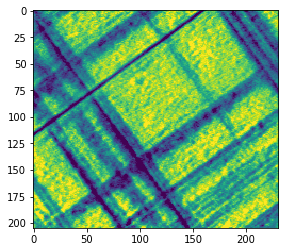

In [10]:
pre = np.load('C:/Users/Josh_/prepull.npy')
plt.imshow(pre)
plt.show()

In [144]:

ag_switch[0].convex_area

14

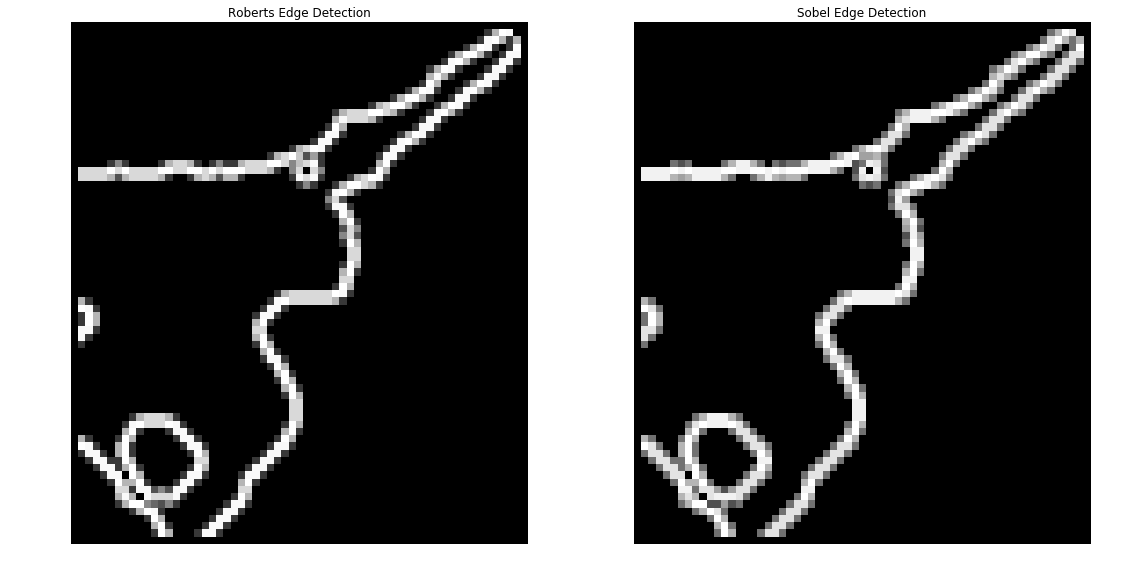

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt

from skimage import feature
image = large_switch[5].image
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

image = large_switch[5].image
edge_roberts = roberts(image)
edge_sobel = sobel(image)
edge_scharr = scharr(image)
edge_prewitt = prewitt(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(16,8))

ax[0].imshow(edge_scharr, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

#ax[2].imshow(edge_scharr, cmap=plt.cm.gray)
#ax[2].set_title('Schar Edge Detection')
#
#ax[4].imshow(edge_prewitt, cmap=plt.cm.gray)
#ax[4].set_title('Prewitt Edge Detection')
#
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Pulling the images and measuring the distance to a domains from edges for doped sample

dist_ls_image =[np.zeros((205,231),dtype=float)]*len(large_switch)
for i,region in enumerate(large_switch):
    inner = []
    rows = region.bbox[0],region.bbox[2]
    cols = region.bbox[1],region.bbox[3]
    mask = np.zeros((205,231),dtype=bool)
    im = region.image
    mask[rows[0]:rows[1],cols[0]:cols[1]] = im
    dist_mask = np.zeros((205,231),dtype=float)
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]>0:
                dist_mask[row,col] = 5+dist_doped[row,col]
    inner.append(dist_mask)
    dist_ls_image[i] = inner

In [17]:
# Pulling the images, finding edges, and measuring the distance to a domains from edges for doped sample

dist_ls_edge_image =[np.zeros((205,231),dtype=float)]*len(large_switch)
for i,region in enumerate(large_switch):
    inner = []
    rows = region.bbox[0],region.bbox[2]
    cols = region.bbox[1],region.bbox[3]
    mask = np.zeros((205,231),dtype=bool)
    im = scharr(region.image)
    mask[rows[0]:rows[1],cols[0]:cols[1]] = im
    dist_mask = np.zeros((205,231),dtype=float)
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]>0:
                dist_mask[row,col] = 5+dist_doped[row,col]
    inner.append(dist_mask)
    dist_ls_edge_image[i] = inner

In [18]:
# Pulling the images, and measuring the distance to a domains from edges for as grown sample
dist_ag_image =[np.zeros((200,237),dtype=float)]*len(ag_switch)
for i,region in enumerate(ag_switch):
    inner = []  # dummy inner sub list to maintain structure of the list
    rows = region.bbox[0],region.bbox[2]
    cols = region.bbox[1],region.bbox[3]
    mask = np.zeros((200,237),dtype=bool)
    im = region.image
    mask[rows[0]:rows[1],cols[0]:cols[1]] = im
    dist_mask = np.zeros((200,237),dtype=float)
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]>0:
                dist_mask[row,col] = 5+dist_doped[row,col]
    dist_mask = dist_mask[rows[0]:rows[1],cols[0]:cols[1]]
    inner.append(dist_mask)
    dist_ag_image[i] = inner

In [19]:
# Pulling the images, finding edges, and measuring the distance to a domains from edges for as grown sample
dist_ag_edge_image =[np.zeros((200,237),dtype=float)]*len(ag_switch)
for i,region in enumerate(ag_switch):
    inner = []  # dummy inner sub list to maintain structure of the list
    rows = region.bbox[0],region.bbox[2]
    cols = region.bbox[1],region.bbox[3]
    mask = np.zeros((200,237),dtype=bool)
    im = scharr(region.image)
    mask[rows[0]:rows[1],cols[0]:cols[1]] = im
    dist_mask = np.zeros((200,237),dtype=float)
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]>0:
                dist_mask[row,col] = 5+dist_doped[row,col]
    dist_mask = dist_mask[rows[0]:rows[1],cols[0]:cols[1]]
    inner.append(dist_mask)
    dist_ag_edge_image[i] = inner

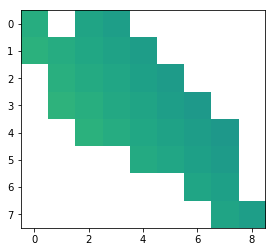

In [20]:
plt.imshow(np.ma.masked_equal(dist_ag_image[1][0],0))
plt.clim(0,40)
plt.show()

In [21]:
ag_mean_dist = []
for image in dist_ag_image:
    inner = []
    inner.append(np.mean(np.ma.masked_equal(image[0],0))*20)
    ag_mean_dist.append(inner)

In [204]:
ag_med_dist = []
for image in dist_ag_image:
    inner = []
    inner.append(np.median(np.ma.masked_equal(image[0],0)))
    ag_med_dist.append(inner)

C:\Users\Josh_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [22]:
mean_dist = []
for image in dist_ls_image:
    inner = []
    inner.append(np.mean(np.ma.masked_equal(image[0],0))*20)
    mean_dist.append(inner)

In [206]:
med_dist = []
for image in dist_ls_image:
    inner = []
    inner.append(np.median(np.ma.masked_equal(image[0],0))*20)
    med_dist.append(inner)

C:\Users\Josh_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


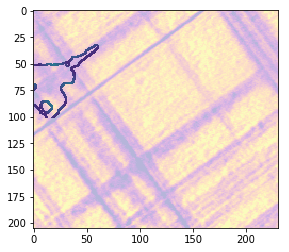

In [48]:
#plt.imshow(dist_ls_edge_image[5][0])

plt.imshow(pre,cmap=plt.cm.plasma, alpha = 0.3)
plt.imshow(np.ma.masked_equal(dist_ls_edge_image[5][0],0))
plt.clim(0,39)
plt.show()

In [30]:
# the first image in the series was unable to detect the edges.
fig = plt.figure()
ax = fig.add_subplot (111)
for i,image in enumerate(dist_ls_image):
    plt.imshow(np.ma.masked_equal(image[0],0),cmap=plt.cm.viridis_r)
    plt.clim(0,38)
    plt.axis('off')
    plt.savefig("D:/switching study/indy_figs/doped/dist_im" +str(i), format="eps", dpi=400)
    plt.close()

In [31]:
fig = plt.figure()
ax = fig.add_subplot (111)
for i,image in enumerate(dist_ag_image):
    plt.imshow(np.ma.masked_equal(image[0],0),cmap=plt.cm.viridis_r)
    plt.axis('off')
    plt.clim(0,38)
    plt.savefig("D:/switching study/indy_figs/asgrown/dist_im" +str(i), format="eps", dpi=400)
    plt.close()

In [238]:
# the first image in the series was unable to detect the edges.
for i,image in enumerate(dist_ls_edge_image[1:]):
    plt.hist(image[0].reshape(-1))
    plt.axis('off')
    plt.savefig("D:/switching study/indy_figs/doped/hist" +str(i+1), format='eps', dpi=400)
    plt.close()

In [242]:
# No issues with the edge detection.
for i,image in enumerate(dist_ag_edge_image):
    plt.hist(image[0].reshape(-1))
    plt.axis('off')
    plt.savefig("D:/switching study/indy_figs/asgrown/hist" +str(i), format='eps', dpi=400)
    plt.close()

In [28]:
fig = plt.figure()
ax = fig.add_subplot (111)
for i,image in enumerate(dist_ag_edge_image):
    plt.imshow(np.ma.masked_equal(image[0],0),cmap=plt.cm.viridis_r)
    plt.clim(0,38)
    plt.axis('off')
    plt.savefig("D:/switching study/indy_figs/asgrown/edges/dist_edges" +str(i), format="eps", dpi=400)
    plt.close()

In [29]:
fig = plt.figure()
ax = fig.add_subplot (111)
for i,image in enumerate(dist_ls_edge_image[1:]):
    plt.imshow(np.ma.masked_equal(image[0],0),cmap=plt.cm.viridis_r)
    plt.axis('off')
    plt.savefig("D:/switching study/indy_figs/doped/edges/dist_edges" +str(i), format="eps", dpi=400)
    plt.close()

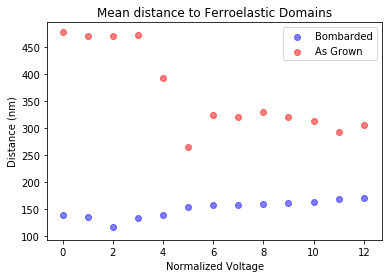

In [220]:
for n, (d_mean,ag_mean) in enumerate(zip(mean_dist,ag_mean_dist)):
    for number in d_mean:
        plt.scatter(n,number,marker ='o',c='b', alpha=0.5, label="B_mean")
#    for number in d_med:
#        plt.scatter(n,number,c='b', alpha=0.5, label="B_med")
    for number in ag_mean:
        plt.scatter(n,number,marker ='o',c='r', alpha=0.5, label="Ag_mean")
#    for number in ag_med:
#        plt.scatter(n,number,c='r', alpha=0.5, label="Ag_med")        
    
plt.title("Mean distance to Ferroelastic Domains")
plt.legend(("Bombarded", "As Grown"), loc='upper right')
plt.xlabel('Normalized Voltage')
plt.ylabel('Distance (nm)')
plt.savefig("D:/switching study/indy_figs/mean_dist" , format="eps", dpi=400)
plt.show()

In [145]:
14/14

1.0

In [154]:
# computing the ratio of the convex hull image and the area of the region
area_ratio = [None]*len(large_switch)
for i,regions in enumerate(large_switch):
    inner_area = []
    inner_area.append(regions.area/(regions.convex_area))
    area_ratio[i] = inner_area

In [158]:
# computing the ratio of the convex hull image and the area of the region
area_ag_ratio = [None]*len(ag_switch)
for i,regions in enumerate(ag_switch):
    inner_area = []
    inner_area.append(regions.area/(regions.convex_area))
    print(inner_area)
    area_ag_ratio[i] = inner_area

[1.0]
[0.89189189189189189]
[0.92307692307692313]
[0.84166666666666667]
[0.77813504823151125]
[0.66700000000000004]
[0.63109286813750642]
[0.68161634103019542]
[0.75]
[0.79390380313199105]
[0.69114194236926363]
[0.47997886951928154]
[0.48412040872687101]


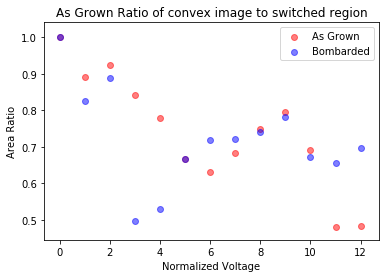

In [159]:
for n, (ag,d_) in enumerate(zip(area_ag_ratio,area_ratio)):
    for number in ag:
        plt.scatter(n,number,c='r', alpha=0.5, label="As Grown")
    for number in d_:
        plt.scatter(n,number,c='b', alpha=0.5, label="Bombarded")
    
plt.title("As Grown Ratio of convex image to switched region")
plt.legend(("As Grown", "Bombarded"), loc='upper right')
plt.xlabel('Normalized Voltage')
plt.ylabel('Area Ratio')
#plt.savefig("D:/switching study/nucleation figures/dist_ag" , format="eps", dpi=400)
plt.show()

In [165]:
# computing the ratio of the convex hull image and the area of the region
ag_orient = [None]*len(ag_switch)
for i,regions in enumerate(ag_switch):
    inner = []
    inner.append(regions.orientation*180/np.pi)
    ag_orient[i] = inner

In [268]:
# computing the ratio of the convex hull image and the area of the region
orient = [None]*len(large_switch)
for i,regions in enumerate(large_switch):
    inner = []
    inner.append(regions.orientation*180/np.pi)
    orient[i] = inner

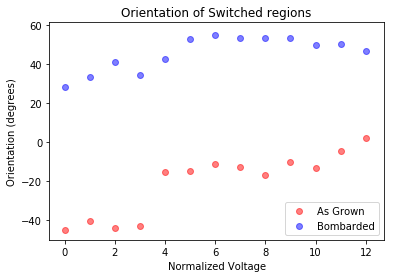

In [170]:
for n, (ag,d_) in enumerate(zip(ag_orient,orient)):
    for number in ag:
        plt.scatter(n,number,c='r', alpha=0.5, label="As Grown")
    for number in d_:
        plt.scatter(n,number,c='b', alpha=0.5, label="Bombarded")
    
plt.title("Orientation of Switched regions")
plt.legend(("As Grown", "Bombarded"), loc='lower right')
plt.xlabel('Normalized Voltage')
plt.ylabel('Orientation (degrees)')
#plt.savefig("D:/switching study/nucleation figures/dist_ag" , format="eps", dpi=400)
plt.show()

In [266]:
# computing the major axis length
ag_major = [None]*len(ag_switch)
for i,regions in enumerate(ag_switch):
    inner = []
    inner.append(regions.major_axis_length)
    ag_major[i] = inner

In [274]:
# computing the major axis length
major = [None]*len(large_switch)
for i,regions in enumerate(large_switch):
    inner = []
    inner.append(regions.major_axis_length)
    major[i] = inner

In [275]:
# computing the minor axis length
minor = [None]*len(large_switch)
for i,regions in enumerate(large_switch):
    inner = []
    inner.append(regions.minor_axis_length)
    minor[i] = inner

In [245]:
# computing the minor axis length
ag_minor = [None]*len(ag_switch)
for i,regions in enumerate(ag_switch):
    inner = []
    inner.append(regions.minor_axis_length)
    ag_minor[i] = inner

[[3.1558174334820754],
 [4.048933643732745],
 [4.974563871223786],
 [6.36356274534147],
 [12.887264785979132],
 [21.149497366713096],
 [30.50636965686344],
 [32.95717223423941],
 [40.53264163546979],
 [48.27482377357967],
 [55.21339608036576],
 [78.6086239349572],
 [75.08066556147097]]

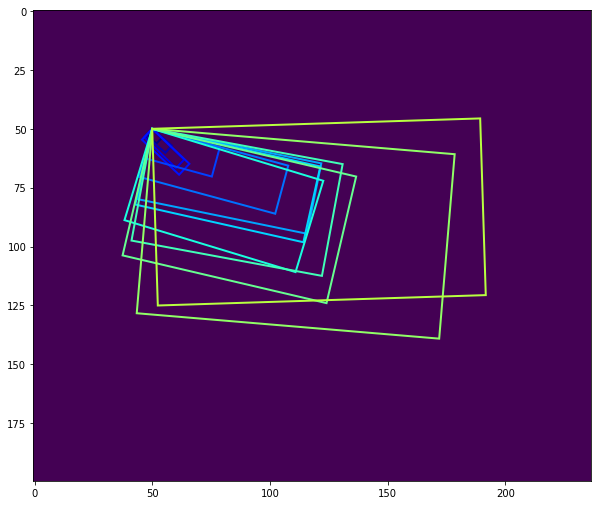

In [271]:
cmap = plt.get_cmap('jet')
map_ = cmap(np.linspace(0,1,22))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.zeros((200,237),dtype=float))
    
for i,(orie, minor, major) in enumerate(zip(ag_orient,ag_minor,ag_major)):
        
    rect = mpatches.Rectangle((50, 50), major[0], minor[0],-orie[0],
                                fill=False, edgecolor=map_[i], linewidth=2)
    ax.add_patch(rect)
plt.show()

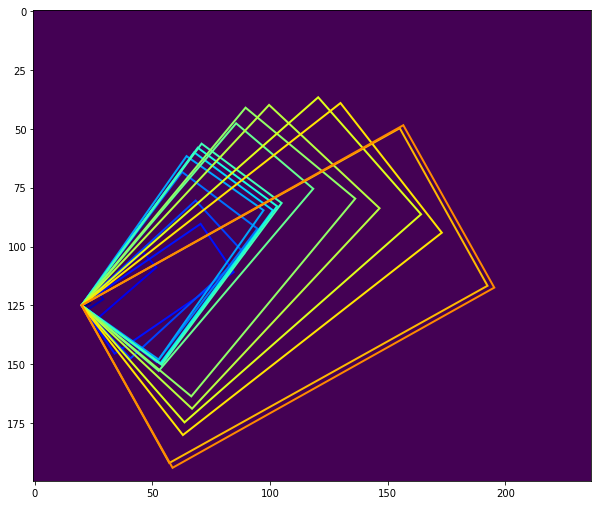

In [280]:
cmap = plt.get_cmap('jet')
map_ = cmap(np.linspace(0,1,22))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.zeros((200,237),dtype=float))
    
for i,(orie, minr, majr) in enumerate(zip(orient,minor,major)):
        
    rect = mpatches.Rectangle((20, 125), majr[0], minr[0],-orie[0],
                                fill=False, edgecolor=map_[i], linewidth=2)
    ax.add_patch(rect)
plt.show()